In [1]:
!torch.cuda.is_available()

/bin/bash: -c: line 1: syntax error: unexpected end of file


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install transformers

     |████████████████████████████████| 573kB 4.8MB/s 
     |████████████████████████████████| 3.7MB 21.3MB/s 
     |████████████████████████████████| 1.0MB 52.2MB/s 
     |████████████████████████████████| 890kB 41.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=3ac04228008549802a53cde4f9f657aeacefe50296e2b72f50fa7353ccc5a14c
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sacremoses


In [4]:
!pip install pytorch_pretrained_bert tools

     |████████████████████████████████| 133kB 4.8MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
  Created wheel for tools: filename=tools-0.1.9-cp36-none-any.whl size=46760 sha256=01729f3aa95d46e7b8dfd5c886a17e028d501915dc78790f91f5117aafcd45e1
  Stored in directory: /root/.cache/pip/wheels/87/67/9b/1ca7dcb0b9ebfdc23a00c85a0644abb6fb14f9159a0df8e067
  Created wheel for pytils: filename=pytils-0.3-cp36-none-any.whl size=40355 sha256=42f10005fcc4ea1be9b0aca57138dcfd0a1dfd0e497c2f7a63c11e92e36ec0f4
  Stored in directory: /root/.cache/pip/wheels/d6/f9/dc/4f07d8ee40d9cfca9973b3f4aeff99d0bb69900e5f3dffbf32
Successfully built tools pytils


In [0]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import random_split
import torch.nn as nn

In [6]:
cd /content/drive/My\ Drive


/content/drive/My Drive


In [7]:
!pip install contractions
!pip install inflect
!pip install fuzzywuzzy

#text preprocess file
import unicodedata
import contractions  
import inflect       
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words



     |████████████████████████████████| 245kB 6.7MB/s 
     |████████████████████████████████| 317kB 45.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81706 sha256=cd76a2a402f152260af6d8116562b2d80343274d902e6ec003313c543ac86a9c
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [0]:
import warnings
warnings.filterwarnings("ignore")
import re
def clean_tweet(tweet): #remove user name, special characters and urls
    tweet = str(tweet)
    # removing urls
    tweet = re.sub(r'https?://\S+',' ',tweet)
    # removing RTs
    tweet = re.sub('RT @[A-Za-z0-9_]+: ', '', tweet)
    # removing user names
    user_names = re.findall(r"(@[A-Za-z0-9_]+)", tweet)
    #iterating to remove multiple user names
    for i in user_names:
        tweet = re.sub(i,' ', tweet)
    # replacing the special characters and numbers
    tweet = re.sub(r'([^A-Za-z\s])',' ',tweet)
    #replacing multiple spaces in to a single space
    tweet = re.sub(' +',' ', tweet)
    return tweet
  
#removing the altmeric word in article name
def remove_alt(article_name):
    k = article_name.split()
    if(k[0]=="Altmetric"):
        a = k[2:]
        article_name = ' '.join(a)
    return article_name

In [0]:
import re            
def insert_mask(tweet,title):
    tweet=str(tweet)
    title=str(title)
    mat = re.match(title,tweet)
    if mat:
        new_tweet = tweet.replace(title,' ArticleTitle ')
        mask_val = 'ArticleTitle'
    else:
        new_tweet = tweet
        mask_val =  'NoTitle' 
    return new_tweet,mask_val

In [0]:
def preprocess(text):
    text = replace_contractions(text)
    content = nltk.word_tokenize(text)
    words = remove_non_ascii(content)
    words = to_lowercase(content)
    words = remove_punctuation(words)
    text = ' '.join(words)
    return text

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import pandas as pd


In [0]:
import pandas as pd
xls = pd.ExcelFile('dataset.xlsx')
neg_df = pd.read_excel(xls, 'negative')
pos_df = pd.read_excel(xls, 'positive')
neu_df = pd.read_excel(xls, 'neutral')

In [142]:
from sklearn.utils import shuffle
neg_df = shuffle(neg_df)
pos_df = shuffle(pos_df)
neu_df = shuffle(neu_df)
print(len(neg_df))
print(len(pos_df))
print(len(neu_df))


1139
1200
3523


In [0]:
neg_df.reset_index(drop=True, inplace= True)
pos_df.reset_index(drop=True, inplace= True)
neu_df.reset_index(drop=True, inplace= True)

In [144]:
neg_val_df = neg_df[:150]
neg_train_df = neg_df[150:]
pos_val_df = pos_df[:150]
pos_train_df = pos_df[150:1150]
neu_val_df = neu_df[:450]
neu_train_df = neu_df[450:3450]
print(len(neg_train_df))
print(len(pos_train_df))
print(len(neu_train_df))

989
1000
3000


In [145]:
from sklearn.utils import resample
neg_train_df_sampled = resample(neg_train_df, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000)   # to match majority class
                                 


neg_train_df_sampled.shape

(1000, 3)

In [0]:
train_df = neg_train_df_sampled.append(pos_train_df, ignore_index= True)
train_df = train_df.append(neu_train_df, ignore_index= True)

In [0]:
test_df = neg_val_df.append(pos_val_df, ignore_index= True)
test_df = test_df.append(neu_val_df, ignore_index= True)

In [0]:
train_df.head()

,tweets,sentiment,article_title
0,RT @Paddy_Barrett: The staggering rise of glob...,-1,worldwide trends in bodymass index underweight...
1,Regulatory T Cell Responses in Participants wi...,-1,regulatory t cell responses in participants wi...
2,A UK doctor has been struck off after a tragic...,-1,back to blame the bawagarba case and the patie...
3,Regulatory T Cell Responses in Participants wi...,-1,regulatory t cell responses in participants wi...
4,"A trainee paediatrician, an apprentice, makes ...",-1,back to blame the bawagarba case and the patie...


In [0]:
test_df.head()

,tweets,sentiment,article_title
0,Failure to exclusively breastfeeding linked to...,-1,exclusive breastfeeding and cognition executiv...
1,"RT @Unsolicitations: So that complicated, life...",-1,research and development spending to bring a s...
2,Health workers & weaponisation of health care ...,-1,health workers and the weaponisation of health...
3,It may just be me... but it looks like the mos...,-1,eating disorders in children and young people
4,RT @NEJM: Perspective: #Cholera in Yemen — An ...,-1,cholera in yemen an old foe rearing its ugly head


In [0]:
pred_df_m2015 = pd.read_excel('medical_tweets_2015.xlsx')
pred_df_m2016_1 = pd.read_excel('medical_tweets_2016_1.xlsx')
pred_df_m2016_2 = pd.read_excel('medical_tweets_2016_2.xlsx')
pred_df_m2016_3 = pd.read_excel('medical_tweets_2016_3.xlsx')
pred_df_m2017 = pd.read_excel('medical_tweets_2017.xlsx')
pred_df_p2016 = pd.read_excel('psychiatry_tweets_2016.xlsx')

In [0]:
pred_df_m2015.dropna(inplace=True)
pred_df_m2016_1.dropna(inplace=True)
pred_df_m2016_2.dropna(inplace=True)
pred_df_m2016_3.dropna(inplace=True)
pred_df_m2017.dropna(inplace=True)
pred_df_p2016.dropna(inplace=True)

In [0]:
pred_df_m2015.drop_duplicates(inplace=True)
pred_df_m2016_1.drop_duplicates(inplace=True)
pred_df_m2016_2.drop_duplicates(inplace=True)
pred_df_m2016_3.drop_duplicates(inplace=True)
pred_df_m2017.drop_duplicates(inplace=True)
pred_df_p2016.drop_duplicates(inplace=True)

In [0]:
train_df['tweets']=train_df['tweets'].apply(clean_tweet)
train_df['tweets']=train_df['tweets'].apply(preprocess)
train_df['article_title']=train_df['article_title'].apply(clean_tweet)
train_df['article_title']=train_df['article_title'].apply(preprocess)


In [0]:
test_df['tweets']=test_df['tweets'].apply(clean_tweet)
test_df['tweets']=test_df['tweets'].apply(preprocess)
test_df['article_title']=test_df['article_title'].apply(clean_tweet)
test_df['article_title']=test_df['article_title'].apply(preprocess)


In [0]:
pred_df_m2015['tweet_post']=pred_df_m2015['tweet_post'].apply(clean_tweet)
pred_df_m2015['tweet_post']=pred_df_m2015['tweet_post'].apply(preprocess)
pred_df_m2015['article_name']=pred_df_m2015['article_name'].apply(remove_alt)
pred_df_m2015['article_name']=pred_df_m2015['article_name'].apply(clean_tweet)
pred_df_m2015['article_name']=pred_df_m2015['article_name'].apply(preprocess)
pred_df_m2015.replace('', np.nan, inplace=True)
pred_df_m2015=pred_df_m2015.dropna()

In [0]:
pred_df_m2016_1['tweet_post']=pred_df_m2016_1['tweet_post'].apply(clean_tweet)
pred_df_m2016_1['tweet_post']=pred_df_m2016_1['tweet_post'].apply(preprocess)
pred_df_m2016_1['article_name']=pred_df_m2016_1['article_name'].apply(remove_alt)
pred_df_m2016_1['article_name']=pred_df_m2016_1['article_name'].apply(clean_tweet)
pred_df_m2016_1['article_name']=pred_df_m2016_1['article_name'].apply(preprocess)
pred_df_m2016_1.replace('', np.nan, inplace=True)
pred_df_m2016_1=pred_df_m2016_1.dropna()

In [0]:
pred_df_m2016_2['tweet_post']=pred_df_m2016_2['tweet_post'].apply(clean_tweet)
pred_df_m2016_2['tweet_post']=pred_df_m2016_2['tweet_post'].apply(preprocess)
pred_df_m2016_2['article_name']=pred_df_m2016_2['article_name'].apply(remove_alt)
pred_df_m2016_2['article_name']=pred_df_m2016_2['article_name'].apply(clean_tweet)
pred_df_m2016_2['article_name']=pred_df_m2016_2['article_name'].apply(preprocess)
pred_df_m2016_2.replace('', np.nan, inplace=True)
pred_df_m2016_2=pred_df_m2016_2.dropna()

In [0]:
pred_df_m2016_3['tweet_post']=pred_df_m2016_3['tweet_post'].apply(clean_tweet)
pred_df_m2016_3['tweet_post']=pred_df_m2016_3['tweet_post'].apply(preprocess)
pred_df_m2016_3['article_name']=pred_df_m2016_3['article_name'].apply(remove_alt)
pred_df_m2016_3['article_name']=pred_df_m2016_3['article_name'].apply(clean_tweet)
pred_df_m2016_3['article_name']=pred_df_m2016_3['article_name'].apply(preprocess)
pred_df_m2016_3.replace('', np.nan, inplace=True)
pred_df_m2016_3=pred_df_m2016_3.dropna()

In [0]:
pred_df_m2017['tweet_post']=pred_df_m2017['tweet_post'].apply(clean_tweet)
pred_df_m2017['tweet_post']=pred_df_m2017['tweet_post'].apply(preprocess)
pred_df_m2017['article_name']=pred_df_m2017['article_name'].apply(remove_alt)
pred_df_m2017['article_name']=pred_df_m2017['article_name'].apply(clean_tweet)
pred_df_m2017['article_name']=pred_df_m2017['article_name'].apply(preprocess)
pred_df_m2017.replace('', np.nan, inplace=True)
pred_df_m2017=pred_df_m2017.dropna()

In [0]:
pred_df_p2016['tweet_post']=pred_df_p2016['tweet_post'].apply(clean_tweet)
pred_df_p2016['tweet_post']=pred_df_p2016['tweet_post'].apply(preprocess)
pred_df_p2016['article_name']=pred_df_p2016['article_name'].apply(remove_alt)
pred_df_p2016['article_name']=pred_df_p2016['article_name'].apply(clean_tweet)
pred_df_p2016['article_name']=pred_df_p2016['article_name'].apply(preprocess)
pred_df_p2016.replace('', np.nan, inplace=True)
pred_df_p2016=pred_df_p2016.dropna()

In [0]:
masked_tweet = []
masked_val = []
for tweet, title in zip(train_df['tweets'], train_df['article_title']):
  new1_tweet,mask1_val = insert_mask(tweet,title)
  masked_tweet.append(new1_tweet)
  masked_val.append(mask1_val)


In [0]:
train_df['masked_tweets'] = masked_tweet
train_df['mask_value'] = masked_val

In [0]:
masked_tweet = []
masked_val = []
for tweet, title in zip(test_df['tweets'], test_df['article_title']):
  new1_tweet,mask1_val = insert_mask(tweet,title)
  masked_tweet.append(new1_tweet)
  masked_val.append(mask1_val)


In [0]:
test_df['masked_tweets'] = masked_tweet
test_df['mask_value'] = masked_val

In [0]:
test_df.head()

,tweets,sentiment,article_title,masked_tweets,mask_value
0,failure to exclusively breastfeeding linked to...,-1,exclusive breastfeeding and cognition executiv...,failure to exclusively breastfeeding linked to...,NoTitle
1,so that complicated life saving drug is expens...,-1,research and development spending to bring a s...,so that complicated life saving drug is expens...,NoTitle
2,health workers weaponisation of health care in...,-1,health workers and the weaponisation of health...,health workers weaponisation of health care in...,NoTitle
3,it may just be me but it looks like the most g...,-1,eating disorders in children and young people,it may just be me but it looks like the most g...,NoTitle
4,perspective cholera in yemen an old foe rearin...,-1,cholera in yemen an old foe rearing its ugly head,perspective cholera in yemen an old foe rearin...,NoTitle


In [0]:
masked_tweet = []
masked_val = []
dummy_sentiment =[]
for tweet, title in zip(pred_df_m2015['tweet_post'], pred_df_m2015['article_name']):
  new1_tweet,mask1_val = insert_mask(tweet,title)
  masked_tweet.append(new1_tweet)
  masked_val.append(mask1_val)
  dummy_sentiment.append(0)

  
pred_df_m2015['masked_tweets'] = masked_tweet
pred_df_m2015['mask_value'] = masked_val
pred_df_m2015['dummy_sentiment'] = dummy_sentiment

In [0]:
masked_tweet = []
masked_val = []
dummy_sentiment =[]
for tweet, title in zip(pred_df_m2016_1['tweet_post'], pred_df_m2016_1['article_name']):
  new1_tweet,mask1_val = insert_mask(tweet,title)
  masked_tweet.append(new1_tweet)
  masked_val.append(mask1_val)
  dummy_sentiment.append(0)

  
pred_df_m2016_1['masked_tweets'] = masked_tweet
pred_df_m2016_1['mask_value'] = masked_val
pred_df_m2016_1['dummy_sentiment'] = dummy_sentiment

In [0]:
masked_tweet = []
masked_val = []
dummy_sentiment =[]
for tweet, title in zip(pred_df_m2016_2['tweet_post'], pred_df_m2016_2['article_name']):
  new1_tweet,mask1_val = insert_mask(tweet,title)
  masked_tweet.append(new1_tweet)
  masked_val.append(mask1_val)
  dummy_sentiment.append(0)

  
pred_df_m2016_2['masked_tweets'] = masked_tweet
pred_df_m2016_2['mask_value'] = masked_val
pred_df_m2016_2['dummy_sentiment'] = dummy_sentiment

In [0]:
masked_tweet = []
masked_val = []
dummy_sentiment =[]
for tweet, title in zip(pred_df_m2016_3['tweet_post'], pred_df_m2016_3['article_name']):
  new1_tweet,mask1_val = insert_mask(tweet,title)
  masked_tweet.append(new1_tweet)
  masked_val.append(mask1_val)
  dummy_sentiment.append(0)

  
pred_df_m2016_3['masked_tweets'] = masked_tweet
pred_df_m2016_3['mask_value'] = masked_val
pred_df_m2016_3['dummy_sentiment'] = dummy_sentiment

In [0]:
masked_tweet = []
masked_val = []
dummy_sentiment=[]
for tweet, title in zip(pred_df_m2017['tweet_post'], pred_df_m2017['article_name']):
  new1_tweet,mask1_val = insert_mask(tweet,title)
  masked_tweet.append(new1_tweet)
  masked_val.append(mask1_val)
  dummy_sentiment.append(0)

  
pred_df_m2017['masked_tweets'] = masked_tweet
pred_df_m2017['mask_value'] = masked_val
pred_df_m2017['dummy_sentiment'] = dummy_sentiment

In [0]:
masked_tweet = []
masked_val = []
dummy_sentiment=[]
for tweet, title in zip(pred_df_p2016['tweet_post'], pred_df_p2016['article_name']):
  new1_tweet,mask1_val = insert_mask(tweet,title)
  masked_tweet.append(new1_tweet)
  masked_val.append(mask1_val)
  dummy_sentiment.append(0)

  
pred_df_p2016['masked_tweets'] = masked_tweet
pred_df_p2016['mask_value'] = masked_val
pred_df_p2016['dummy_sentiment'] = dummy_sentiment

In [0]:
from sklearn import model_selection

In [0]:
newtrain_df, valid_df = model_selection.train_test_split(
        train_df,
        test_size=0.1,
        random_state=42,
        stratify=train_df.sentiment.values
    )

In [0]:
newtrain_df = newtrain_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [0]:
newtrain_df.shape

(4500, 5)

In [0]:
valid_df.shape

(500, 5)

In [0]:
valid_df[valid_df.sentiment==0].shape[0]

300

In [0]:
newtrain_df.head()

,tweets,sentiment,article_title,masked_tweets,mask_value
0,ammmmmmazing,0,postural modification to the standard valsalva...,ammmmmmazing,NoTitle
1,always inspiring to read prof blendon s most r...,1,health care in the election a view through vot...,always inspiring to read prof blendon s most r...,NoTitle
2,ibuprofen versus fosfomycin for uncomplicated ...,0,ibuprofen versus fosfomycin for uncomplicated ...,ArticleTitle,ArticleTitle
3,new quick take video reports results of new st...,1,on demand preexposure prophylaxis in men at hi...,new quick take video reports results of new st...,NoTitle
4,study mass pdmp ehr data shows one tactic for ...,-1,coupling policymaking with evaluation the case...,study mass pdmp ehr data shows one tactic for ...,NoTitle


In [0]:
train_df_bert = pd.DataFrame({
    'id':range(len(newtrain_df)),
    'label':newtrain_df['sentiment'],
    'alpha':newtrain_df['mask_value'],
    'text': newtrain_df['masked_tweets'].replace(r'\n', ' ', regex=True)
})

In [0]:
valid_df.shape

(500, 5)

In [0]:
valid_df_bert = pd.DataFrame({
    'id':range(len(valid_df)),
    'label':valid_df['sentiment'],
    'alpha':valid_df['mask_value'],
    'text': valid_df['masked_tweets'].replace(r'\n', ' ', regex=True)
})

In [0]:
test_df_bert = pd.DataFrame({
    'id':range(len(test_df)),
    'label':test_df['sentiment'],
    'alpha':test_df['mask_value'],
    'text': test_df['masked_tweets'].replace(r'\n', ' ', regex=True)
})

In [0]:
pred_df_m2015_bert = pd.DataFrame({
    'id':range(len(pred_df_m2015)),
    'label':pred_df_m2015['dummy_sentiment'],
    'alpha':pred_df_m2015['mask_value'],
    'text': pred_df_m2015['masked_tweets'].replace(r'\n', ' ', regex=True)
})

In [0]:
pred_df_m2016_1_bert = pd.DataFrame({
    'id':range(len(pred_df_m2016_1)),
    'label':pred_df_m2016_1['dummy_sentiment'],
    'alpha':pred_df_m2016_1['mask_value'],
    'text': pred_df_m2016_1['masked_tweets'].replace(r'\n', ' ', regex=True)
})

In [0]:
pred_df_m2016_2_bert = pd.DataFrame({
    'id':range(len(pred_df_m2016_2)),
    'label':pred_df_m2016_2['dummy_sentiment'],
    'alpha':pred_df_m2016_2['mask_value'],
    'text': pred_df_m2016_2['masked_tweets'].replace(r'\n', ' ', regex=True)
})

In [0]:
pred_df_m2016_3_bert = pd.DataFrame({
    'id':range(len(pred_df_m2016_3)),
    'label':pred_df_m2016_3['dummy_sentiment'],
    'alpha':pred_df_m2016_3['mask_value'],
    'text': pred_df_m2016_3['masked_tweets'].replace(r'\n', ' ', regex=True)
})

In [0]:
pred_df_m2017_bert = pd.DataFrame({
    'id':range(len(pred_df_m2017)),
    'label':pred_df_m2017['dummy_sentiment'],
    'alpha':pred_df_m2017['mask_value'],
    'text': pred_df_m2017['masked_tweets'].replace(r'\n', ' ', regex=True)
})

In [0]:
pred_df_p2016_bert = pd.DataFrame({
    'id':range(len(pred_df_p2016)),
    'label':pred_df_p2016['dummy_sentiment'],
    'alpha':pred_df_p2016['mask_value'],
    'text': pred_df_p2016['masked_tweets'].replace(r'\n', ' ', regex=True)
})

In [0]:
train_df_bert.to_csv('data/train.tsv', sep='\t', index=False, header=False)

In [0]:
test_df_bert.to_csv('data/test.tsv', sep='\t', index=False, header=False)

In [0]:
valid_df_bert.to_csv('data/valid.tsv', sep='\t', index=False, header=False)

In [0]:
pred_df_m2015_bert.to_csv('data/pred_df_m2015_bert.tsv', sep='\t', index=False, header=False)

In [0]:
pred_df_m2016_1_bert.to_csv('data/pred_df_m2016_1_bert.tsv', sep='\t', index=False, header=False)

In [0]:
pred_df_m2016_2_bert.to_csv('data/pred_df_m2016_2_bert.tsv', sep='\t', index=False, header=False)

In [0]:
pred_df_m2016_3_bert.to_csv('data/pred_df_m2016_3_bert.tsv', sep='\t', index=False, header=False)

In [0]:
pred_df_m2017_bert.to_csv('data/pred_df_m2017_bert.tsv', sep='\t', index=False, header=False)

In [0]:
pred_df_p2016_bert.to_csv('data/pred_df_p2016_bert.tsv', sep='\t', index=False, header=False)

In [0]:
from __future__ import absolute_import, division, print_function

import csv
import os
import sys
import logging

logger = logging.getLogger()
csv.field_size_limit(2147483647) # Increase CSV reader's field limit incase we have long text.


class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        """Constructs a InputExample.
        Args:
            guid: Unique id for the example.
            text_a: string. The untokenized text of the first sequence. For single
            sequence tasks, only this sequence must be specified.
            text_b: (Optional) string. The untokenized text of the second sequence.
            Only must be specified for sequence pair tasks.
            label: (Optional) string. The label of the example. This should be
            specified for train and dev examples, but not for test examples.
        """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label


class DataProcessor(object):
    """Base class for data converters for sequence classification data sets."""

    def get_train_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the train set."""
        raise NotImplementedError()

    def get_dev_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the dev set."""
        raise NotImplementedError()
    
    def get_test_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the test set."""
        raise NotImplementedError()
    
    def get_predict_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the test set."""
        raise NotImplementedError()

    def get_labels(self):
        """Gets the list of labels for this data set."""
        raise NotImplementedError()

    @classmethod
    def _read_tsv(cls, input_file, quotechar=None):
        """Reads a tab separated value file."""
        with open(input_file, "r", encoding="utf-8") as f:
            reader = csv.reader(f, delimiter="\t", quotechar=quotechar)
            lines = []
            for line in reader:
                if sys.version_info[0] == 2:
                    line = list(unicode(cell, 'utf-8') for cell in line)
                lines.append(line)
            return lines


class ClassificationProcessor(DataProcessor):
    """Processor for  classification of dataset."""

    def get_train_examples(self, data_dir):
        """See base class."""
        return self._create_examples(
            self._read_tsv(os.path.join(data_dir, "train.tsv")), "train")

    def get_dev_examples(self, data_dir):
        """See base class."""
        return self._create_examples(
            self._read_tsv(os.path.join(data_dir, "valid.tsv")), "dev")
    def get_test_examples(self, data_dir):
        """See base class."""
        return self._create_examples(
            self._read_tsv(os.path.join(data_dir, "test.tsv")), "dev")
        
    def get_predict_examples(self, data_dir):
        """See base class."""
        return self._create_examples(
            self._read_tsv(os.path.join(data_dir, "pred_df_p2016_bert.tsv")), "dev")    
    
    def get_labels(self):
        """See base class."""
        return ["-1", "0", "1"]

    def _create_examples(self, lines, set_type):
        """Creates examples for the training and dev sets."""
        examples = []
        for (i, line) in enumerate(lines):
            if (len (line) > 3 ):
              guid = "%s-%s" % (set_type, i)
              text_a = line[3]
              if set_type == "test":
                label = "0" 
              else:
                label = line[1]
              examples.append(
                  InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
        return examples

In [0]:
class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, input_mask, segment_ids, label_id):
        self.input_ids = input_ids
        self.input_mask = input_mask
        self.segment_ids = segment_ids
        self.label_id = label_id

def _truncate_seq_pair(tokens_a, tokens_b, max_length):
    """Truncates a sequence pair in place to the maximum length."""

    while True:
        total_length = len(tokens_a) + len(tokens_b)
        if total_length <= max_length:
            break
        if len(tokens_a) > len(tokens_b):
            tokens_a.pop()
        else:
            tokens_b.pop()


def convert_example_to_feature(example_row):
    # return example_row
    example, label_map, max_seq_length, tokenizer, output_mode = example_row

    tokens_a = tokenizer.tokenize(example.text_a)

    tokens_b = None
    if example.text_b:
        tokens_b = tokenizer.tokenize(example.text_b)
        _truncate_seq_pair(tokens_a, tokens_b, max_seq_length - 3)
    else:
        if len(tokens_a) > max_seq_length - 2:
            tokens_a = tokens_a[:(max_seq_length - 2)]

    tokens = ["[CLS]"] + tokens_a + ["[SEP]"]
    segment_ids = [0] * len(tokens)

    if tokens_b:
        tokens += tokens_b + ["[SEP]"]
        segment_ids += [1] * (len(tokens_b) + 1)

    #token=[CLS]+SentenceA+[SEP]
    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    padding = [0] * (max_seq_length - len(input_ids))
    input_ids += padding
    input_mask += padding
    segment_ids += padding

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    if output_mode == "classification":
        label_id = label_map[example.label]
        #print(label_id)
    elif output_mode == "regression":
        label_id = float(example.label)
    else:
        raise KeyError(output_mode)
    
    return InputFeatures(input_ids=input_ids,
                         input_mask=input_mask,
                         segment_ids=segment_ids,
                         label_id=label_id)

In [0]:
import torch
import numpy as np
import pickle
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler, TensorDataset)
from torch.nn import CrossEntropyLoss, MSELoss
import tqdm
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm, trange
import os
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM, BertForSequenceClassification
from pytorch_pretrained_bert.optimization import BertAdam, WarmupLinearSchedule

from multiprocessing import Pool, cpu_count
from tools import *

import logging
logging.basicConfig(level=logging.INFO)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
from transformers import AdamW, BertConfig


In [0]:
# The input data dir. Should contain the .tsv files (or other data files) for the task.
DATA_DIR = "data/"

# Bert pre-trained model selected in the list: bert-base-uncased, 
# bert-large-uncased, bert-base-cased, bert-large-cased, bert-base-multilingual-uncased,
# bert-base-multilingual-cased, bert-base-chinese.
BERT_MODEL = 'bert-base-uncased'

# The name of the task to train(can use any names).
TASK_NAME = 'yelp'

# The output directory where the fine-tuned model and checkpoints will be written.
OUTPUT_DIR = f'outputs/{TASK_NAME}/'

# This is where BERT will look for pre-trained models to load parameters from.
CACHE_DIR = 'cache/'

# The maximum total input sequence length after WordPiece tokenization.
# Sequences longer than this will be truncated, and sequences shorter than this will be padded.
MAX_SEQ_LENGTH = 512

TRAIN_BATCH_SIZE = 6
EVAL_BATCH_SIZE = 6
LEARNING_RATE = 3e-5
NUM_TRAIN_EPOCHS = 6
RANDOM_SEED = 42
#GRADIENT_ACCUMULATION_STEPS = 1
#WARMUP_PROPORTION = 0.1
OUTPUT_MODE = 'classification'

CONFIG_NAME = "config.json"
WEIGHTS_NAME = "pytorch_model.bin"

In [0]:
output_mode = OUTPUT_MODE

cache_dir = CACHE_DIR

In [0]:
if os.path.exists(OUTPUT_DIR) and os.listdir(OUTPUT_DIR):
        raise ValueError("Output directory ({}) already exists and is not empty.".format(OUTPUT_DIR))
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [0]:
processor = ClassificationProcessor()
train_examples = processor.get_train_examples(DATA_DIR)
train_examples_len = len(train_examples)

label_list = processor.get_labels() # [-1, 0, 1] for classification
num_labels = len(label_list)


In [0]:
print(num_labels)

3


In [0]:
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL, do_lower_case=True)


INFO:pytorch_pretrained_bert.file_utils:https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt not found in cache, downloading to /tmp/tmpnojxu2zt
100%|██████████| 231508/231508 [00:00<00:00, 2580407.09B/s]
INFO:pytorch_pretrained_bert.file_utils:copying /tmp/tmpnojxu2zt to cache at /root/.pytorch_pretrained_bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
INFO:pytorch_pretrained_bert.file_utils:creating metadata file for /root/.pytorch_pretrained_bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
INFO:pytorch_pretrained_bert.file_utils:removing temp file /tmp/tmpnojxu2zt
INFO:pytorch_pretrained_bert.tokenization:loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at /root/.pytorch_pretrained_bert/26bc1ad6c0ac742e9b52263248f6d0f0006

In [0]:
label_map = {label: i for i, label in enumerate(label_list)}
train_examples_for_processing = [(example, label_map, MAX_SEQ_LENGTH, tokenizer, OUTPUT_MODE) for example in train_examples]

In [0]:
print (label_map)
process_count = cpu_count() - 1
if __name__ ==  '__main__':
    print(f'Preparing to convert {train_examples_len} examples..')
    print(f'Spawning {process_count} processes..')
    with Pool(process_count) as p:
        train_features = list(tqdm_notebook(p.imap(convert_example_to_feature, train_examples_for_processing), total=train_examples_len))

{'-1': 0, '0': 1, '1': 2}
Preparing to convert 4500 examples..
Spawning 3 processes..


In [0]:
with open("data/train_features.pkl", "wb") as f:
    pickle.dump(train_features, f)

In [0]:

# Load pre-trained model (weights)
model = BertForSequenceClassification.from_pretrained(BERT_MODEL, cache_dir=CACHE_DIR, num_labels=num_labels)

INFO:pytorch_pretrained_bert.file_utils:https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz not found in cache, downloading to /tmp/tmpmmbbkgaw
100%|██████████| 407873900/407873900 [00:07<00:00, 55390486.19B/s]
INFO:pytorch_pretrained_bert.file_utils:copying /tmp/tmpmmbbkgaw to cache at cache/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
INFO:pytorch_pretrained_bert.file_utils:creating metadata file for cache/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
INFO:pytorch_pretrained_bert.file_utils:removing temp file /tmp/tmpmmbbkgaw
INFO:pytorch_pretrained_bert.modeling:loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at cache/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af6397

In [0]:
model = nn.DataParallel(model)

In [0]:
model.to(device)


DataParallel(
  (module): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): BertLayerNorm()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
                (LayerNorm): BertLa

In [0]:
all_input_ids = torch.tensor([f.input_ids for f in train_features], dtype=torch.long)
all_input_mask = torch.tensor([f.input_mask for f in train_features], dtype=torch.long)
all_segment_ids = torch.tensor([f.segment_ids for f in train_features], dtype=torch.long)

if OUTPUT_MODE == "classification":
    all_label_ids = torch.tensor([f.label_id for f in train_features], dtype=torch.long)
    #loss_fct = CrossEntropyLoss()
elif OUTPUT_MODE == "regression":
    all_label_ids = torch.tensor([f.label_id for f in train_features], dtype=torch.float)
    #loss_fct = MSELoss()

In [0]:
train_dataset = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)

In [0]:
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=TRAIN_BATCH_SIZE)


In [0]:
processor = ClassificationProcessor()
valid_examples = processor.get_dev_examples(DATA_DIR)
label_list = processor.get_labels() # [-1, 0, 1] for classification
num_labels = len(label_list)
valid_examples_len = len(valid_examples)

In [0]:
label_map = {label: i for i, label in enumerate(label_list)}
valid_examples_for_processing = [(example, label_map, MAX_SEQ_LENGTH, tokenizer, OUTPUT_MODE) for example in valid_examples]

In [0]:
  process_count = cpu_count() - 1
  if __name__ ==  '__main__':
      print(f'Preparing to convert {valid_examples_len} examples..')
      print(f'Spawning {process_count} processes..')
      with Pool(process_count) as p:
          valid_features = list(tqdm_notebook(p.imap(convert_example_to_feature, valid_examples_for_processing), total=valid_examples_len))

Preparing to convert 500 examples..
Spawning 3 processes..


In [0]:
all_input_ids = torch.tensor([f.input_ids for f in valid_features], dtype=torch.long)
all_input_mask = torch.tensor([f.input_mask for f in valid_features], dtype=torch.long)
all_segment_ids = torch.tensor([f.segment_ids for f in valid_features], dtype=torch.long)
all_label_ids = torch.tensor([f.label_id for f in valid_features], dtype=torch.long)


In [0]:

valid_data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)

valid_sampler = SequentialSampler(valid_data)
validation_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=EVAL_BATCH_SIZE)

In [0]:
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

In [0]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]

In [0]:

epochs = NUM_TRAIN_EPOCHS

total_steps = len(train_dataloader) * epochs



In [0]:
#num_train_optimization_steps = int(train_examples_len / TRAIN_BATCH_SIZE / GRADIENT_ACCUMULATION_STEPS) * NUM_TRAIN_EPOCHS

In [0]:
#optimizer = BertAdam(optimizer_grouped_parameters,
 #                    lr=LEARNING_RATE,
  #                   warmup=WARMUP_PROPORTION,
   #                  t_total=num_train_optimization_steps)
optimizer = AdamW(optimizer_grouped_parameters,
                  lr = LEARNING_RATE,
                  )

In [0]:
# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)


In [0]:
logger.info("  Num examples = %d", train_examples_len)
logger.info("  Batch size = %d", TRAIN_BATCH_SIZE)
logger.info("  Num steps = %d", total_steps)

INFO:root:  Num examples = 4500
INFO:root:  Batch size = 6
INFO:root:  Num steps = 4500


In [0]:
#Max(Number of occurrences in most common class) / (Number of occurrences in rare classes)


In [0]:
weights = [0.33,1.0,0.33]
class_weights = torch.FloatTensor(weights).to(device)

In [0]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()


In [0]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


In [0]:
from sklearn.metrics import matthews_corrcoef, classification_report,confusion_matrix


In [0]:
def cal_eval_metrics(predictions,true_labels,epochval):
  flat_predictions = np.concatenate(predictions, axis=0)
  flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
  flat_true_labels = np.concatenate(true_labels, axis=0)
  mcc = matthews_corrcoef(flat_true_labels, flat_predictions)
  print("Mcc and classification report for Epoch :",epochval)
  print(classification_report(flat_true_labels, flat_predictions))
  print(confusion_matrix(flat_true_labels, flat_predictions))
  print('Total MCC: %.3f' % mcc)

In [0]:
epochs = int(NUM_TRAIN_EPOCHS)
#best_accuracy = 0
# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    predictions , true_labels = [], []
    predictions_train , true_labels_train = [], []

    # Measure how long the training epoch takes.
    t0 = time.time()
    total_train_accuracy=0
    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
            if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)
            
            # Report progress.
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_segment_ids, b_label_ids = batch
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically  
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
            model.zero_grad()        
            logits = model(b_input_ids, token_type_ids=b_segment_ids, attention_mask=b_input_mask,labels=None)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
            loss_fct = CrossEntropyLoss(weight=class_weights)
            loss = loss_fct(logits.view(-1, num_labels), b_label_ids.view(-1))
            total_train_loss += loss.item()
            logits_train = logits.detach().cpu().numpy()
            label_ids_train = b_label_ids.to('cpu').numpy()
        
        
            predictions_train.append(logits_train)
            true_labels_train.append(label_ids_train)
        
        
            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            total_train_accuracy += flat_accuracy(logits_train, label_ids_train)
            
            
            
        # Perform a backward pass to calculate the gradients.
            loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
            optimizer.step()

        # Update the learning rate.
            scheduler.step()

    # Report the final accuracy for this training run.
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_train_accuracy))

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_mcc = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    
    for batch in validation_dataloader:
     
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_segment_ids, b_label_ids = batch
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            logits = model(b_input_ids, 
                                   token_type_ids=b_segment_ids, 
                                   attention_mask=b_input_mask,
                                   labels=None)
            
        # Accumulate the validation loss.
        loss_fct = CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, num_labels), b_label_ids.view(-1))
            
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_label_ids.to('cpu').numpy()
        
        
        predictions.append(logits)
        true_labels.append(label_ids)
        
        
        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        
    cal_eval_metrics(predictions,true_labels,epoch_i+1)
    
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Train Accur.' : avg_train_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )


print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 6 ========
Training...
  Batch    40  of    750.    Elapsed: 0:00:51.
  Batch    80  of    750.    Elapsed: 0:01:41.
  Batch   120  of    750.    Elapsed: 0:02:32.
  Batch   160  of    750.    Elapsed: 0:03:23.
  Batch   200  of    750.    Elapsed: 0:04:14.
  Batch   240  of    750.    Elapsed: 0:05:04.
  Batch   280  of    750.    Elapsed: 0:05:55.
  Batch   320  of    750.    Elapsed: 0:06:46.
  Batch   360  of    750.    Elapsed: 0:07:36.
  Batch   400  of    750.    Elapsed: 0:08:27.
  Batch   440  of    750.    Elapsed: 0:09:18.
  Batch   480  of    750.    Elapsed: 0:10:09.
  Batch   520  of    750.    Elapsed: 0:10:59.
  Batch   560  of    750.    Elapsed: 0:11:50.
  Batch   600  of    750.    Elapsed: 0:12:41.
  Batch   640  of    750.    Elapsed: 0:13:31.
  Batch   680  of    750.    Elapsed: 0:14:22.
  Batch   720  of    750.    Elapsed: 0:15:13.
  Accuracy: 0.76

  Average training loss: 0.46
  Training epcoh took: 0:15:51

Running Validation...
Mcc and c

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')


# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Train Accur.,Training Time,Validation Time
epoch,,,,,,
1,0.46,0.32,0.84,0.76,0:15:51,0:00:35
2,0.26,0.32,0.89,0.90,0:15:49,0:00:35
3,0.14,0.41,0.89,0.95,0:15:47,0:00:35
4,0.10,0.33,0.91,0.96,0:15:46,0:00:35
5,0.06,0.42,0.92,0.98,0:15:46,0:00:35
6,0.04,0.40,0.92,0.98,0:15:46,0:00:35


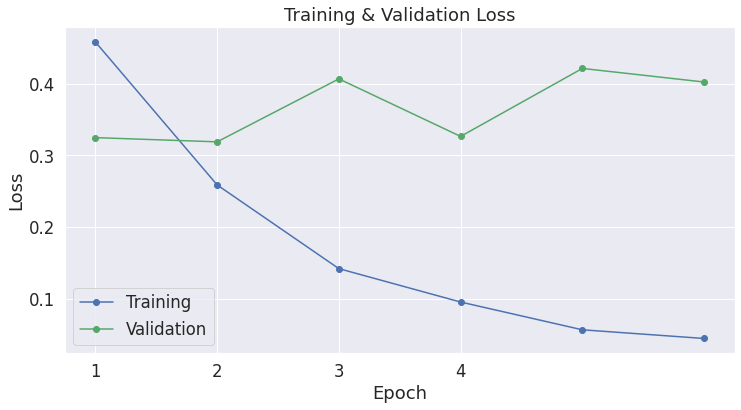

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()


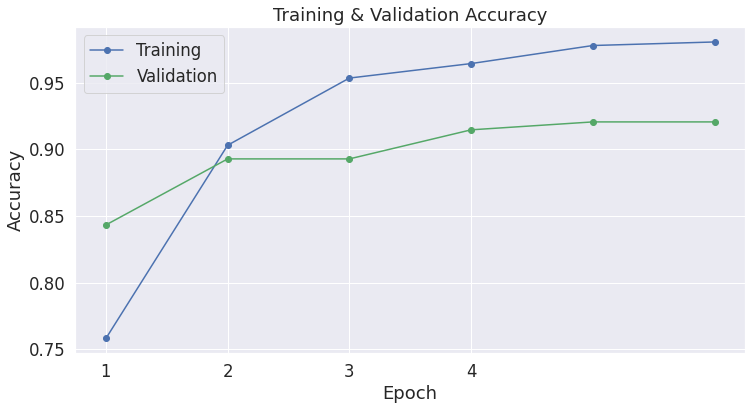

In [0]:
plt.plot(df_stats['Train Accur.'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Accur.'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()


In [0]:
model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self


# If we save using the predefined names, we can load using `from_pretrained`
output_model_file = os.path.join(OUTPUT_DIR, WEIGHTS_NAME)
output_config_file = os.path.join(OUTPUT_DIR, CONFIG_NAME)

torch.save(model_to_save.state_dict(), output_model_file)
model_to_save.config.to_json_file(output_config_file)
#model_to_save.save_pretrained(OUTPUT_DIR)
#tokenizer.save_pretrained(OUTPUT_DIR)
tokenizer.save_vocabulary(OUTPUT_DIR)

'outputs/yelp/vocab.txt'

In [0]:
tokenizer = BertTokenizer.from_pretrained(OUTPUT_DIR + 'vocab.txt', do_lower_case=True)

INFO:pytorch_pretrained_bert.tokenization:loading vocabulary file outputs/yelp/vocab.txt


In [0]:
processor = ClassificationProcessor()
test_examples = processor.get_test_examples(DATA_DIR)
label_list = processor.get_labels() # [-1, 0, 1] for classification
num_labels = len(label_list)
test_examples_len = len(test_examples)

In [0]:
label_map = {label: i for i, label in enumerate(label_list)}
test_examples_for_processing = [(example, label_map, MAX_SEQ_LENGTH, tokenizer, OUTPUT_MODE) for example in test_examples]

In [0]:
  process_count = cpu_count() - 1
  if __name__ ==  '__main__':
      print(f'Preparing to convert {test_examples_len} examples..')
      print(f'Spawning {process_count} processes..')
      with Pool(process_count) as p:
          test_features = list(tqdm_notebook(p.imap(convert_example_to_feature, test_examples_for_processing), total=test_examples_len))

Preparing to convert 750 examples..
Spawning 3 processes..


In [0]:
all_input_ids = torch.tensor([f.input_ids for f in test_features], dtype=torch.long)
all_input_mask = torch.tensor([f.input_mask for f in test_features], dtype=torch.long)
all_segment_ids = torch.tensor([f.segment_ids for f in test_features], dtype=torch.long)
all_label_ids = torch.tensor([f.label_id for f in test_features], dtype=torch.long)


In [0]:

test_data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)

test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=EVAL_BATCH_SIZE)

In [0]:
#Testing

model.eval()

# Tracking variables 
predictions_test , true_labels_test = [], []

 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_segment_ids, b_label_ids = batch
  
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=b_segment_ids, attention_mask=b_input_mask,labels=None)

  
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_label_ids.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions_test.append(logits)
  true_labels_test.append(label_ids)

print('    DONE.')

    DONE.


In [0]:

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels_test)):
  
  # The predictions for this batch are a 3-column ndarray (one column for "0" 
  # , one column for "1" and another for "2"). Pick the label with the highest value and turn this
  # in to a list of 0s, 1s and 2s.
  pred_labels_i = np.argmax(predictions_test[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels_test[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [0]:
# Combine the results across all batches. 
flat_predictions_test = np.concatenate(predictions_test, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions_test = np.argmax(flat_predictions_test, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels_test = np.concatenate(true_labels_test, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels_test, flat_predictions_test)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.802


In [0]:
print("Testing Accuracy:",accuracy_score(flat_true_labels_test, flat_predictions_test))

Testing Accuracy: 0.8906666666666667


In [0]:
print(classification_report(flat_true_labels_test, flat_predictions_test))


              precision    recall  f1-score   support

           0       0.88      0.75      0.81       150
           1       0.90      0.96      0.93       450
           2       0.86      0.84      0.85       150

    accuracy                           0.89       750
   macro avg       0.88      0.85      0.86       750
weighted avg       0.89      0.89      0.89       750



In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
print(confusion_matrix(flat_true_labels_test, flat_predictions_test))


[[112  29   9]
 [  9 430  11]
 [  6  18 126]]


In [0]:
#Prediction

In [0]:
# The input data dir. Should contain the .tsv files (or other data files) for the task.
DATA_DIR = "data/"

BERT_MODEL = 'bert-base-uncased.tar.gz'

TASK_NAME = 'yelp'

# The output directory where the fine-tuned model and checkpoints will be written.
OUTPUT_DIR = f'outputs/{TASK_NAME}/'

# The directory where the evaluation reports will be written to.
REPORTS_DIR = f'reports/{TASK_NAME}_evaluation_reports/'

# This is where BERT will look for pre-trained models to load parameters from.
CACHE_DIR = 'cache/'

# The maximum total input sequence length after WordPiece tokenization.
# Sequences longer than this will be truncated, and sequences shorter than this will be padded.
MAX_SEQ_LENGTH = 512

TRAIN_BATCH_SIZE = 6
EVAL_BATCH_SIZE = 6
LEARNING_RATE = 3e-5
NUM_TRAIN_EPOCHS = 3
RANDOM_SEED = 42
#GRADIENT_ACCUMULATION_STEPS = 1
#WARMUP_PROPORTION = 0.1
OUTPUT_MODE = 'classification'
CONFIG_NAME = "config.json"
WEIGHTS_NAME = "pytorch_model.bin"

In [0]:
#Load the files pred_df_m2015_bert.tsv, pred_df_m2016_1_bert.tsv,pred_df_m2016_2_bert.tsv,pred_df_m2016_3_bert.tsv, pred_df_m2017_bert.tsv, pred_df_p2016_bert.tsv one by one in get_predict_examples() function in class ClassificationProcessor and execute the following code after each loading in-order to find respective predictions

In [52]:
tokenizer = BertTokenizer.from_pretrained(CACHE_DIR + 'vocab.txt', cache_dir=CACHE_DIR, do_lower_case=True)

INFO:pytorch_pretrained_bert.tokenization:loading vocabulary file cache/vocab.txt


In [53]:
model = BertForSequenceClassification.from_pretrained(CACHE_DIR + 'bert-base-uncased.tar.gz', cache_dir=CACHE_DIR, num_labels=3)

INFO:pytorch_pretrained_bert.modeling:loading archive file cache/bert-base-uncased.tar.gz
INFO:pytorch_pretrained_bert.modeling:extracting archive file cache/bert-base-uncased.tar.gz to temp dir /tmp/tmp_4r57s7i
INFO:pytorch_pretrained_bert.modeling:Model config {
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "type_vocab_size": 2,
  "vocab_size": 30522
}



In [54]:
model = nn.DataParallel(model)
model.to(device)

DataParallel(
  (module): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): BertLayerNorm()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
                (LayerNorm): BertLa

In [0]:
processor = ClassificationProcessor()
pred_examples = processor.get_predict_examples(DATA_DIR)
label_list = processor.get_labels() # dummy labels for prediction
num_labels = len(label_list)
pred_examples_len = len(pred_examples)

In [0]:
label_map = {label: i for i, label in enumerate(label_list)}
pred_examples_for_processing = [(example, label_map, MAX_SEQ_LENGTH, tokenizer, OUTPUT_MODE) for example in pred_examples]

In [135]:
process_count = cpu_count() - 1
if __name__ ==  '__main__':
      print(f'Preparing to convert {pred_examples_len} examples..')
      print(f'Spawning {process_count} processes..')
      with Pool(process_count) as p:
          pred_features = list(tqdm_notebook(p.imap(convert_example_to_feature, pred_examples_for_processing), total=pred_examples_len))

Preparing to convert 20976 examples..
Spawning 3 processes..


In [0]:
all_input_ids = torch.tensor([f.input_ids for f in pred_features], dtype=torch.long)
all_input_mask = torch.tensor([f.input_mask for f in pred_features], dtype=torch.long)
all_segment_ids = torch.tensor([f.segment_ids for f in pred_features], dtype=torch.long)
all_label_ids = torch.tensor([f.label_id for f in pred_features], dtype=torch.long)


In [0]:

predict_data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)

# Run prediction for full data
predict_sampler = SequentialSampler(predict_data)
predict_dataloader = DataLoader(predict_data, sampler=predict_sampler, batch_size=EVAL_BATCH_SIZE)

In [138]:
#Testing

model.eval()

# Tracking variables 
predictions_test = []

 
for batch in predict_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_segment_ids, b_label_ids = batch
  
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=b_segment_ids, attention_mask=b_input_mask,labels=None)

  
  # Move logits to CPU
  logits = logits.detach().cpu().numpy()
  
  # Store predictions
  predictions_test.append(logits)
  
print('    DONE.')

    DONE.


In [0]:
# Combine the results across all batches. 
flat_predictions_test = np.concatenate(predictions_test, axis=0)

# For each sample, pick the label with the higher score.
flat_predictions_test = np.argmax(flat_predictions_test, axis=1).flatten()



In [0]:
prediction_list = flat_predictions_test.tolist()
sentiment=[]
for item in prediction_list:
    if item == 0:
        sentiment.append("negative")
    elif item == 1:
        sentiment.append("neutral")
    elif item == 2:
        sentiment.append("positive")

pred_df_p2016['predicted_sentiment']=sentiment
pred_df_p2016.to_csv("pred_df_p2016.csv")